In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
from statsmodels.graphics.tsaplots import plot_acf

In [31]:
# Import data
data = pd.read_csv('data/spx.csv')
data['Close'] = data['Close'].str.replace(',','').astype(float)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close
0,2023-11-21,"4,511.70","4,557.11","4,510.36",4538.19
1,2023-11-17,"4,406.66","4,521.17","4,393.82",4514.02
2,2023-11-10,"4,364.27","4,418.03","4,343.94",4415.24
3,2023-11-03,"4,139.39","4,373.62","4,132.94",4358.34
4,2023-10-27,"4,210.40","4,259.38","4,103.78",4117.37


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

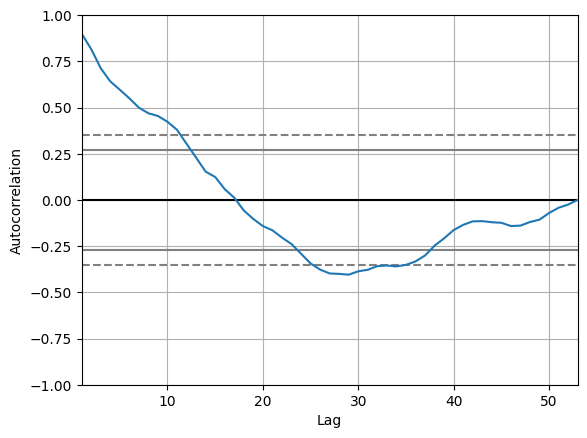

In [33]:
# Plot autocorrelation (ACF) and check wether data is stationary
pd.plotting.autocorrelation_plot(data['Close'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

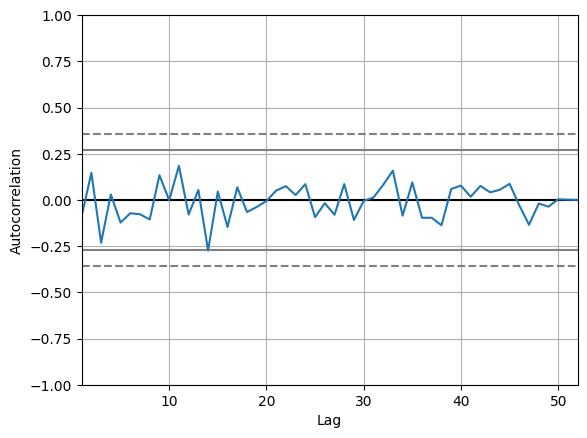

In [34]:
#Transform data to log returns so that the timeseries is stationary
data['LogReturn'] = np.log(data['Close']) - np.log(data['Close'].shift(1))
pd.plotting.autocorrelation_plot(data['LogReturn'].dropna())

As we can see, taking log returns makes the timeseries stationary. We can now fit a HMM to the data.

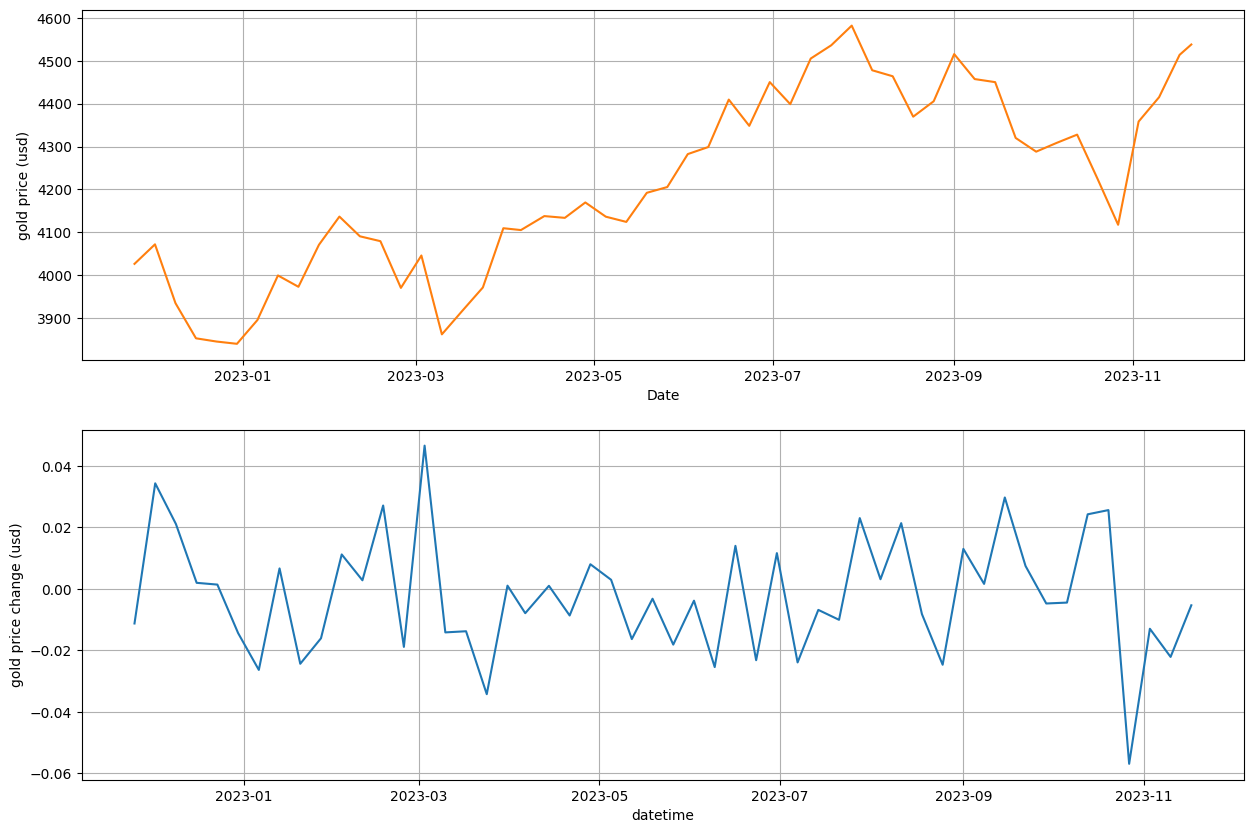

In [35]:
# Split data to train and experimental (validation) data
train_data = data[data["Date"] <= pd.to_datetime("2018-01-01")]
val_data = data[data["Date"] >= pd.to_datetime("2018-01-01")]

# Plot the daily closes as well as the log return.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(train_data["Date"], train_data["Close"])
plt.plot(val_data["Date"], val_data["Close"])
plt.xlabel("Date")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["Date"], data["LogReturn"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

In [40]:
# Let hmm library carry out Baum-Welch algorithm to fit HMM to data, and use BIC to find best model
# Since Baum-Welch is an EM algorithm, we need to test different parameters to find the best model
X = train_data[["LogReturn"]].values
model1 = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 100, random_state = 42)
model2 = hmm.GaussianHMM(n_components = 3, covariance_type = "full", n_iter = 100, random_state = 42)
#model3 = hmm.CategoricalHMM(n_components = 3,  n_iter = 100, random_state = 42)
models = [model1, model2]

bestModel = None
bestBIC = np.inf
for model in models:
    model.fit(X)
    BIC = model.bic(X)
    if BIC < bestBIC:
        bestModel = model
        bestBIC = BIC

print("Best model: ", bestModel)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.